In [1]:
import pandas as pd
import unicodedata
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import re
import networkx as nx
import re
from collections import Counter
import unicodedata


# Lectura de Datos para Candidatos 2023

In [2]:
# Lee el archivo .csv en un DataFrame como se explicó anteriormente
archivo_csv = 'Data/candidatos2023.txt'
df = pd.read_csv(archivo_csv, delimiter='\t', encoding='latin1', header=1)

# Función para normalizar caracteres en una celda
def normalize_text(text):
    if isinstance(text, str):
        return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    else:
        return text

# Aplica la normalización de caracteres a todo el DataFrame
df = df.applymap(normalize_text)


In [3]:
asamblea_guajira = df[(df['Descripción del Departamento'] == 'LA GUAJIRA') & (df['Descripción de la Corporación/Cargo'] == 'ASAMBLEA')]

In [100]:
asamblea_guajira[20:50]

,Descripción de la Corporación/Cargo,Descripción de la Circunscripción,Descripción del Departamento,Descripción del Municipio,Descripción de la Comuna/Localidad/Corregimiento,Código Tipo de Agrupación Política,Descripción del Tipo de Agrupación Política,Código de la Agrupación Política,Nombre de la Agrupación Política,Renglón,Número de Cédula de Ciudadanía,Primer Nombre,Segundo Nombre,Primer Apellido,Segundo Apellido,candidatos
76649,ASAMBLEA,DEPARTAMENTAL,LA GUAJIRA,NaN,NaN,1,PARTIDO O MOVIMIENTO POLITICO CON PERSONERIA J...,8,PARTIDO DE LA UNION POR LA GENTE - PARTIDO DE ...,54,40977539,ELIZABETH,MARIA,CUESTA,MARMOL,ELIZABETH MARIA CUESTA MARMOL
76650,ASAMBLEA,DEPARTAMENTAL,LA GUAJIRA,NaN,NaN,1,PARTIDO O MOVIMIENTO POLITICO CON PERSONERIA J...,8,PARTIDO DE LA UNION POR LA GENTE - PARTIDO DE ...,55,1118803815,LUCAS,JAIME,GNECCO,BUSTAMANTE,LUCAS JAIME GNECCO BUSTAMANTE
76651,ASAMBLEA,DEPARTAMENTAL,LA GUAJIRA,NaN,NaN,1,PARTIDO O MOVIMIENTO POLITICO CON PERSONERIA J...,8,PARTIDO DE LA UNION POR LA GENTE - PARTIDO DE ...,57,1136889193,VALERIA,NaN,BALLESTEROS,PINEDO,VALERIA BALLESTEROS PINEDO
76652,ASAMBLEA,DEPARTAMENTAL,LA GUAJIRA,NaN,NaN,1,PARTIDO O MOVIMIENTO POLITICO CON PERSONERIA J...,8,PARTIDO DE LA UNION POR LA GENTE - PARTIDO DE ...,60,84033533,DUBEN,NaN,PUENTE,VILLARREAL,DUBEN PUENTE VILLARREAL
76653,ASAMBLEA,DEPARTAMENTAL,LA GUAJIRA,NaN,NaN,1,PARTIDO O MOVIMIENTO POLITICO CON PERSONERIA J...,8,PARTIDO DE LA UNION POR LA GENTE - PARTIDO DE ...,61,26983346,ROCIO,LUZ,SOLANO,MARULANDA,ROCIO LUZ SOLANO MARULANDA
76778,ASAMBLEA,DEPARTAMENTAL,LA GUAJIRA,NaN,NaN,1,PARTIDO O MOVIMIENTO POLITICO CON PERSONERIA J...,2,PARTIDO CONSERVADOR COLOMBIANO,51,40982755,YASMIRA,DE JESUS,LINDAO,PANA,YASMIRA DE JESUS LINDAO PANA
76779,ASAMBLEA,DEPARTAMENTAL,LA GUAJIRA,NaN,NaN,1,PARTIDO O MOVIMIENTO POLITICO CON PERSONERIA J...,2,PARTIDO CONSERVADOR COLOMBIANO,52,40932379,DEBORA,ELENA,BARROS,FINCE,DEBORA ELENA BARROS FINCE
76780,ASAMBLEA,DEPARTAMENTAL,LA GUAJIRA,NaN,NaN,1,PARTIDO O MOVIMIENTO POLITICO CON PERSONERIA J...,2,PARTIDO CONSERVADOR COLOMBIANO,53,17972901,MARIELO,ENRIQUE,RODRIGUEZ,DAZA,MARIELO ENRIQUE RODRIGUEZ DAZA
76781,ASAMBLEA,DEPARTAMENTAL,LA GUAJIRA,NaN,NaN,1,PARTIDO O MOVIMIENTO POLITICO CON PERSONERIA J...,2,PARTIDO CONSERVADOR COLOMBIANO,54,84089916,DARWING,JOSE,ROMERO,COTES,DARWING JOSE ROMERO COTES
76782,ASAMBLEA,DEPARTAMENTAL,LA GUAJIRA,NaN,NaN,1,PARTIDO O MOVIMIENTO POLITICO CON PERSONERIA J...,2,PARTIDO CONSERVADOR COLOMBIANO,55,16465318,ARNOLDO,ENRIQUE,MARULANDA,NaN,ARNOLDO ENRIQUE MARULANDA


In [6]:
asamblea_guajira['Nombre de la Agrupación Política'].unique()

array(['PARTIDO CENTRO DEMOCRATICO',
       'MOVIMIENTO ALTERNATIVO INDIGENA Y SOCIAL "MAIS"',
       'PARTIDO DE LA UNION POR LA GENTE - PARTIDO DE LA U',
       'PARTIDO CONSERVADOR COLOMBIANO',
       'PARTIDO ALIANZA SOCIAL INDEPENDIENTE "ASI"',
       'PARTIDO CAMBIO RADICAL', 'PACTO HISTORICO',
       'PARTIDO POLITICO DIGNIDAD & COMPROMISO',
       'ALIANZA VERDE - PARTIDO VERDE OXIGENO'], dtype=object)

In [7]:
# Concatenar las columnas "Primer Nombre," "Segundo Nombre," "Primer Apellido," y "Segundo Apellido"
asamblea_guajira.loc[:, 'candidatos'] = asamblea_guajira[['Primer Nombre', 'Segundo Nombre', 'Primer Apellido', 'Segundo Apellido']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Crear un nuevo DataFrame llamado "candidatos" que contiene solo la columna "candidatos"
candidatos = asamblea_guajira[['candidatos']]


C:\Users\STEVEN\AppData\Local\Temp\ipykernel_17968\468688407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asamblea_guajira.loc[:, 'candidatos'] = asamblea_guajira[['Primer Nombre', 'Segundo Nombre', 'Primer Apellido', 'Segundo Apellido']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)


In [92]:
# Guardar el DataFrame "candidatos" en un archivo de texto (.txt) en una carpeta específica
ruta_carpeta = 'Data/'  # Reemplaza esto con la ruta de tu carpeta
nombre_archivo = 'informacion.txt'
ruta_completa = ruta_carpeta + nombre_archivo

asamblea_guajira.to_csv(ruta_completa, index=False, sep='\t', header=True)


**Hay 75 candidatos a la asamblea de la guajira 2023**

In [93]:
asamblea_guajira['candidatos']

76473        BRUNO FARIEL BOVEA MORALES
76474       LEIDY LORENA CORTES SALCEDO
76475      EFREN JOSE GRANADILLO ROSADO
76476    ROBERTO DE JESUS BURGOS ACOSTA
76477      CELENA BEATRIZ RODRIGUEZ PAZ
                      ...              
78197         ALBA LUCIA BARROS MOSCOTE
78198      MARIA VICTORIA ARCIA ESPITIA
78199      OLINDA ISABEL MOSCOTE BARROS
78200    ICEL DANIELA SALGUEDO MARTINEZ
78201         JOSE MARIA BARROS MARQUEZ
Name: candidatos, Length: 75, dtype: object

# Lectura de Datos de Corrupción

In [9]:
# Lee el archivo .csv en un DataFrame como se explicó anteriormente
archivo_csv = 'Data/base-de-datos-general.txt'
df0 = pd.read_csv(archivo_csv, delimiter='\t', encoding='latin1', header=11)

# Función para normalizar caracteres en una celda
def normalize_text(text):
    if isinstance(text, str):
        return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    else:
        return text

# Aplica la normalización de caracteres a todo el DataFrame
cinep_general = df0.applymap(normalize_text)

In [10]:
cinep_general['Actor']

0                                        Ancizar Mosquera
1                                   Andres Felipe Cabrera
2                              Diego Luis Rojas Navarrete
3                                     Eduardo Silva Neira
4                                  Gineth Yisela Caviedes
                              ...                        
4310    Fundacion Servicios y Consultorias Caribe-Func...
4311                          Miguel Enrique Franco Menco
4312                               Everilda Liseth Osorio
4313                                       Eduardo Quiroz
4314                              Jaime Alfonso Lasprilla
Name: Actor, Length: 4315, dtype: object

# Busqueda de Impacto mediatico

**PALABRAS CLAVE** por conteo de frecuencia

In [11]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

choices = ["Jose Barros", "Jose Maria Barros", "Jose Barros Marquez"]
process.extract("JOSE MARIA BARROS MARQUEZ", choices, limit=None)

[('Jose Maria Barros', 95), ('Jose Barros Marquez', 95), ('Jose Barros', 86)]

In [12]:
nombres_cinep = cinep_general['Resumen']

In [13]:

def TF_IDF (data):
    
    palabras_comunes_espanol = ["y", "en", "de", "el", "la", "los", "las", "un",
                                "una", "con", "para", "por", "a", "del", "es", "son", 
                                "no", "si", "al", "su", "como", "lo", "sobre", "entre", "más",
                                "que", "se", "fue", "fueron", "estos", "le", "000", "2016", "habria",
                               "mas", "anos", "2017", "este", "clave", "palabras", "asimismo", "tambien",
                               "ademas", "parte", "esta", "quien", "hechos", "era", "general", "pero",
                               "adicionalmeente", "debido", "sin", "sus", "dos", "incluso", "ello", "10", "ser",
                               "habrian", "cuando", "otros", "traves", "hasta", "2015", "dentro", "habian", "esto", 
                               "todo", "posteriormente", "asi", "tiene", "encuentra", "personas", "encuentran", "adicionalmente",
                               "luis", "embargo", "jose", "habia", "25", "ya", "vale", "desde", "les", "despues", "creado", "donde", "tras",
                               "solo", "tres", "sido", "20", "estarian", "estaba", "ano", "ese", "especifico", "relacion", "cuanto", "anterior", "haga",
                               "eran", "13", "2014", "500", "130", "2024", "mi", "han", "sera", "segun", "frente", "andres", "gasto",
                               "ahora", "2023", "2022", "mientras", "ver", "medio", "poco", "omar", "ni",
                               'quieren', 'crece', 'mensajes',"ha", "mismo", "nos", "muy", "porque", "va"]



    # Crear un objeto CountVectorizer para calcular el Term Frequency
    vectorizer = CountVectorizer(stop_words=palabras_comunes_espanol)

    # Ajustar el vectorizador a los datos de la columna 'Resumen'
    tf_matrix = vectorizer.fit_transform( data )

    # Obtener los términos (palabras) en el vocabulario
    vocabulario = vectorizer.get_feature_names_out()

    # Crear un DataFrame con los valores de TF
    df_tf = pd.DataFrame(data=tf_matrix.toarray(), columns=vocabulario)

    # Visualizar el DataFrame de Term Frequency
#     df_tf

    # Sumar todas las columnas para obtener el recuento de palabras por fila
    word_counts = df_tf.sum(axis=1)

    Frec = df_tf.sum(axis=0)

    # Dividir todas las columnas por el recuento de palabras
    normalized_df_tf = df_tf.div(word_counts, axis=0)

    # Visualizar el DataFrame normalizado
#     normalized_df_tf

     # Binarizar el DataFrame normalized_df_tf
    binary_normalized_df_tf = (normalized_df_tf > 0).astype(int)
#     binary_normalized_df_tf['millones']   
    
    # Calcular la suma por columnas en el DataFrame binarizado
    column_sum = binary_normalized_df_tf.sum()

    # Calcular el valor total de documentos (longitud de filas de binary_normalized_df_tf)
    total_documents_value = len(binary_normalized_df_tf)

    # Calcular el IDF (Inverse Document Frequency)
    idf = np.log(total_documents_value / (column_sum + 1))

    # Filtrar los valores diferentes de cero en el DataFrame
    non_zero_values = normalized_df_tf[normalized_df_tf > 0]

    # Calcular la media entre valores diferentes de cero por columnas
    mean_by_column = non_zero_values.mean()

    # Calcular la desviación estándar entre valores diferentes de cero por columnas
    std_by_column = non_zero_values.std()

    # Crear un nuevo DataFrame con los resultados
    new_df = pd.DataFrame({
        'Frecuencia': Frec,
        'Suma por Columnas': column_sum,
        'IDF': idf,
        'Media': mean_by_column,
        'Desviación Estándar': std_by_column,
        'TF-IDF': 1/ (mean_by_column * idf),
        'TF-IDF_std': (std_by_column) / (idf * mean_by_column *mean_by_column) 

    })
    
    return new_df


In [14]:
#Ordenar datos

control = TF_IDF(cinep_general['Resumen'])
control = control.sort_values(by='TF-IDF', ascending=False)


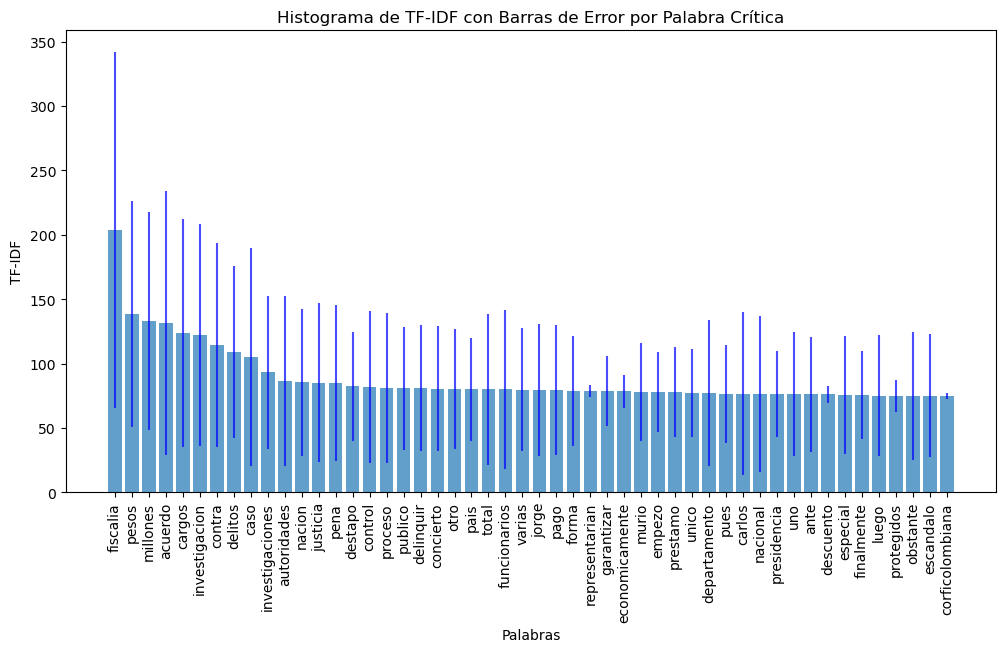

In [15]:
import matplotlib.pyplot as plt

# Definir los ejes X e Y
palabras_control = control.index[0:50]
promedio_frecuencia_control = control['TF-IDF'][0:50]
desviacion_estandar_control = control['TF-IDF_std'][0:50]

# Crear una figura y un eje
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)

# Crear el histograma (barras verticales)
ax.bar(palabras_control, promedio_frecuencia_control, alpha=0.7)

# Agregar barras de error (barras horizontales)
for i in range(len(palabras_control)):
    ax.errorbar(palabras_control[i], promedio_frecuencia_control[i], yerr=desviacion_estandar_control[i], alpha=0.7, color ='b')

# Personalizar el gráfico
plt.title('Histograma de TF-IDF con Barras de Error por Palabra Crítica')
plt.xlabel('Palabras')
plt.ylabel('TF-IDF')

# Rotar las etiquetas del eje X para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


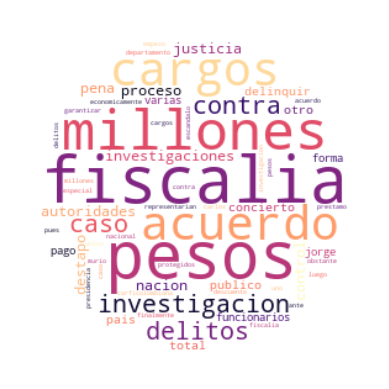

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Crear una cadena de texto a partir del índice de new_df
text = ' '.join(control.index[0:50])

# Círculo
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask, colormap = "magma")

# Generar el WordCloud a partir de la cadena de texto
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()


# Twitter Manual

In [101]:
def twitter (data , numero_palabras = 20):
    
    new_df = TF_IDF( data )

    new_df = new_df.sort_values(by='Suma por Columnas', ascending=False)

    ##############
    
    aux_data = {
    "partido_pol": ["centro democratico", "mais", "partido de la u", "conservador",
                   'cambio radical', 'pacto historico'],
    "bocero": ["Ciro Alejandro Ramírez", "Feliciano Valencia", "Jose David Name", "Efrain Cepeda",
              'Germán Vargas Lleras', 'Gustavo Petro']
    }
    # Crear el DataFrame
    aux = pd.DataFrame(aux_data)
    
    posicion = aux['partido_pol'].tolist().index(data.name)   
    bocero = aux['bocero'][posicion]
    
    ################

    
    plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico

    # Definir los ejes X e Y
    palabras = new_df.index[0:numero_palabras]
    promedio_frecuencia = new_df['Suma por Columnas'][0:numero_palabras]

    # Graficar los puntos de dispersión con barras de error
    plt.bar(palabras, promedio_frecuencia, alpha=0.7)

    # Personalizar el gráfico
    plt.title('Histograma de discurso de Twitter')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')

    # Rotar las etiquetas del eje X para una mejor legibilidad
    plt.xticks(rotation=90)

    # Mostrar el gráfico
    plt.show()

    ##############

    # Obtén las palabras de los dos conjuntos
    palabras = set(new_df.index[0:numero_palabras])
    control = set(palabras_control)

    # Encuentra la intersección de los conjuntos
    palabras_comunes = palabras.intersection(control)

    # Convierte el resultado nuevamente en una lista
    palabras_comunes_lista = list(palabras_comunes)

    # Imprime las palabras comunes
#     print(palabras_comunes_lista)

    ##############

    # Valores de promedio de frecuencia (debes proporcionarlos)
    palabras = new_df.index[0:numero_palabras]
    promedio_frecuencia = new_df['Suma por Columnas'][0:numero_palabras]


    # Obtén las palabras comunes
    palabras_comunes_lista = [palabra for palabra in palabras if palabra in palabras_control]

    # Valor máximo de promedio de frecuencia (normalización)
    max_valor = max(promedio_frecuencia)

    # Normalizar los valores de promedio_frecuencia
    promedio_frecuencia_normalizado = [valor / max_valor for valor in promedio_frecuencia]

    # Crear un grafo vacío
    G = nx.Graph()

    # Agregar nodos al grafo con tamaños normalizados y etiquetas correspondientes a "palabras"
    for i, palabra in enumerate(palabras):
        tamaño = promedio_frecuencia_normalizado[i]
        if palabra in palabras_comunes_lista:
            color = 'green'
        else:
            color = 'gray'
        G.add_node(palabra, size=tamaño, color=color)

    # Organizar las posiciones en una disposición circular descendente
    pos = {}
    num_nodos = len(palabras)
    for i, palabra in enumerate(palabras):
        angulo = 2 * np.pi * i / num_nodos  # Ángulo igualmente espaciado
        pos[palabra] = (np.cos(angulo), np.sin(angulo))  # Coordenadas polares

    # Crear el gráfico de burbujas
    plt.figure(figsize=(8, 8))

    # Dibujar nodos como burbujas
    nx.draw(G, pos, node_size=[tamaño * 2000 for tamaño in promedio_frecuencia_normalizado], node_color=[color for color in nx.get_node_attributes(G, 'color').values()],
           alpha = [tamaño for tamaño in promedio_frecuencia_normalizado])

    # Dibujar las etiquetas de los nodos debajo de ellos
    node_labels = {palabra: palabra for palabra in palabras}
    nx.draw_networkx_labels(G, pos, labels=node_labels, verticalalignment='top')

    # Agregar título y leyenda
    plt.title('Discurso Frecuente en Twitter \nPartido:{} \nBocero:{}'.format(data.name, bocero))

    legend_labels = {
        'Tamaño = Frecuencia': 'gray',
        'Palabras Críticas': 'green',

    }
    legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                      for label, color in legend_labels.items()]
    plt.legend(handles=legend_patches)
    
    # Personalizar el gráfico
    plt.axis('off')

    # Mostrar el gráfico
    plt.show()
    
    ##############
    
    # Crear una lista para almacenar todas las menciones
    todas_menciones = []

    # Iterar a través de los mensajes
    for mensaje in data:
        # Usar expresiones regulares para encontrar todas las menciones en el mensaje
        menciones = re.findall(r'@(\w+)', mensaje)
        todas_menciones.extend(menciones)

    # Contar la frecuencia de cada mención
    contador_menciones = Counter(todas_menciones)

    # Crear un nuevo DataFrame con las menciones y sus frecuencias
    nuevo_df = pd.DataFrame.from_dict(contador_menciones, orient='index', columns=['Frecuencia'])
    nuevo_df.index.name = 'Mención'

    # Ordenar el DataFrame por frecuencia en orden descendente
    nuevo_df = nuevo_df.sort_values(by='Frecuencia', ascending=False)

    ##############
    

    # Obtén los nombres de las menciones y sus frecuencias desde el DataFrame
    menciones = nuevo_df.index
    frecuencias = nuevo_df['Frecuencia']

    # Configura el tamaño del gráfico
    plt.figure(figsize=(8, 8))

    # Crea el gráfico de torta
    plt.pie(frecuencias, labels=menciones, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=.5) )

    # Agrega título
    plt.title('Menciones Hechas en Twitter \nPartido:{} \nBocero:{}'.format(data.name, bocero))
    # Muestra el gráfico
    plt.show()
    
    return 


In [102]:
import pandas as pd
import unicodedata

# Función para normalizar caracteres en una celda
def normalize_text(text):
    if isinstance(text, str):
        return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    else:
        return text

# Lista de nombres de archivos CSV
archivos_csv = ['Data/centroDemocratico.txt', 'Data/mais.txt',
               'Data/partidoDelaU.txt', 'Data/conservador.txt',
               'Data/cambioRadical.txt', 'Data/pactoHistorico.txt']

# Crea un DataFrame vacío
partido_politico = pd.DataFrame()

# Itera sobre la lista de archivos y los carga en el DataFrame
for archivo_csv in archivos_csv:
    # Lee el archivo CSV con el delimitador '\t' y aplica la normalización de caracteres
    df = pd.read_csv(archivo_csv, delimiter='\t', encoding='utf-8', header=None)
    # Aplica la normalización de caracteres a todo el DataFrame
    df = df.applymap(normalize_text)
    # Agrega el DataFrame al DataFrame principal
    partido_politico = pd.concat([partido_politico, df], axis=1)

# Renombra las columnas
partido_politico.columns = ["centro democratico", "mais", "partido de la u",
                           'conservador','cambio radical', 'pacto historico']


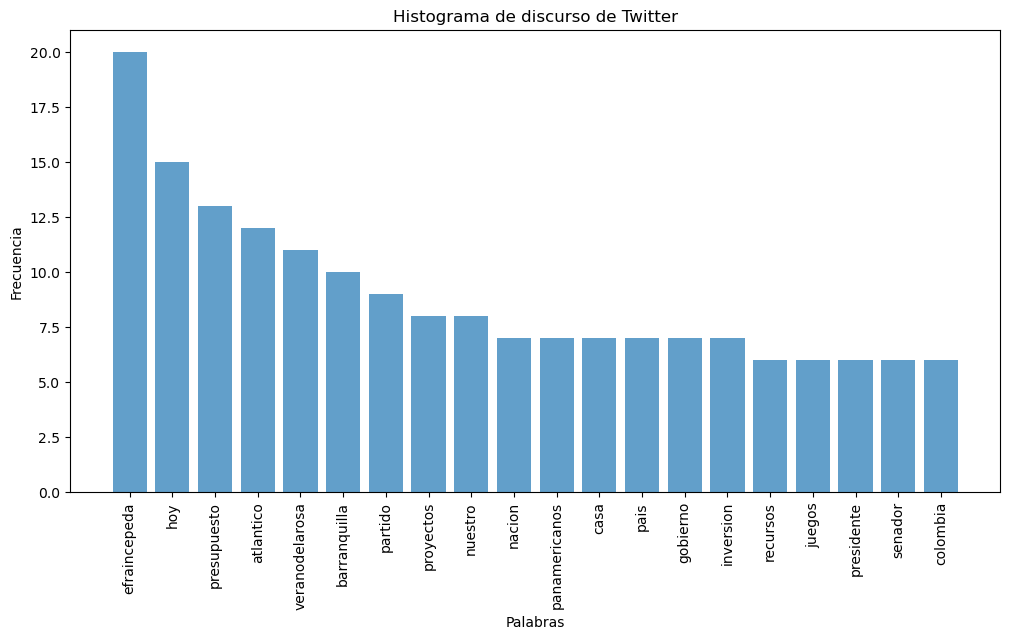

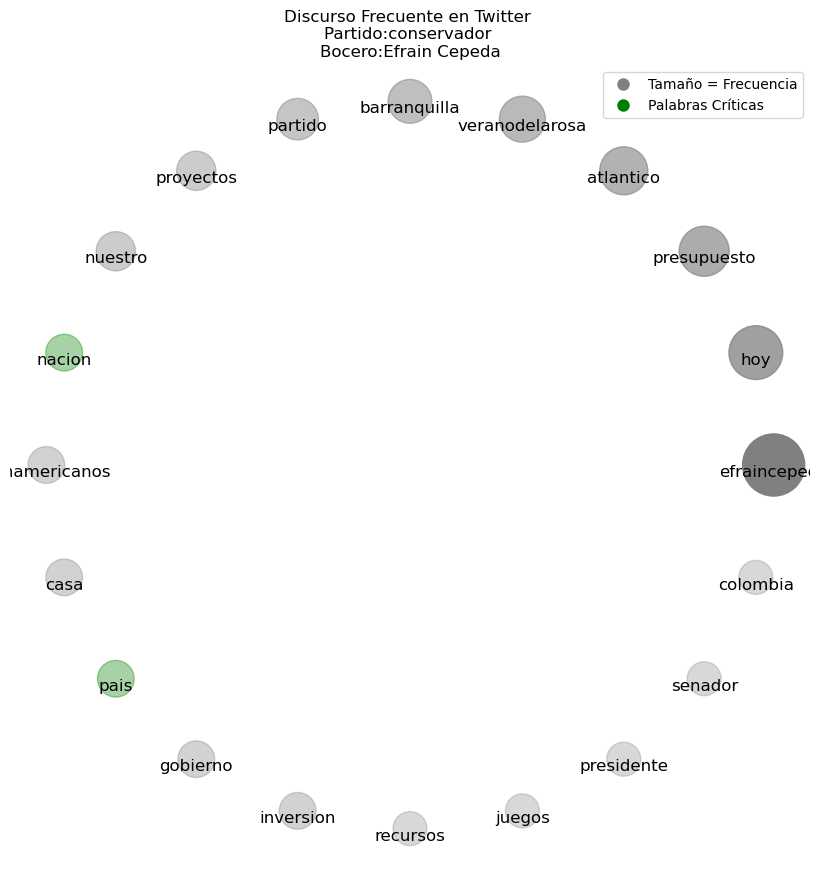

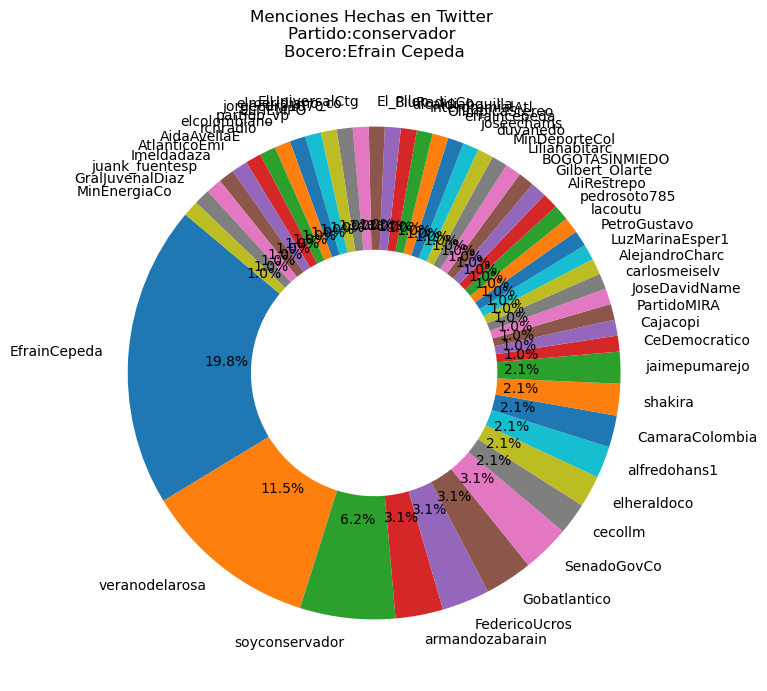

In [105]:
twitter( partido_politico[ 'conservador' ] )